In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from taxiDataset import taxiDataset

In [7]:
sample_percentage = .10
df = pd.read_csv('./assets/year-df-clean.csv')
dataset_size = df.shape[0]

train, valid = train_test_split(df, test_size=0.1)

regr = RandomForestRegressor(n_estimators=40, n_jobs=-1)

xTrain = train.drop(['pickups', 'ind'], axis=1)
yTrain = train['pickups']

xTest = valid.drop(['pickups', 'ind'], axis=1)
yTest = valid['pickups']

regr.fit(xTrain, yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [8]:
for key in xTrain.keys():
    print(key)

print(regr.feature_importances_)

PULocationID
day_of_week
t_bucket
month_of_year
[0.73202825 0.05619784 0.19282792 0.01894598]


33.373958333333334
203.63291666666666


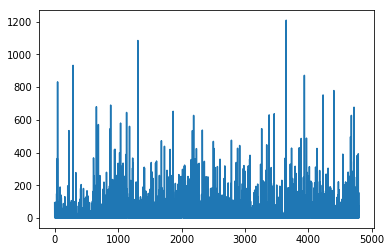

In [9]:
predictions = regr.predict(xTest)
predictions = predictions.astype(int)

train_pred = regr.predict(xTrain)
train_pred = predictions.astype(int)

diff = np.abs(predictions - yTest)

print(np.mean(diff))
print(np.mean(yTest))

x = np.linspace(0, 4799, 4800)
plt.plot(x, diff)
plt.show()

In [ ]:
# sample_percentage = .10
df = pd.read_pickle('/home/lashi/assets/clean-data/data_set_master.pickle')
dataset_size = len(df)

df = df.drop(['month'], axis=1)

train, valid = train_test_split(df, test_size=0.05)

classifier = RandomForestClassifier(n_estimators=40, n_jobs=-1, verbose=3)

xTrain = train.drop(['fare_amount', 'trip_distance', 'fare_bucket', 'dist_bucket'], axis=1)
yTrain = train['fare_bucket']

classifier.fit(xTrain, yTrain)

xTest = valid.drop(['fare_amount', 'trip_distance', 'fare_bucket', 'dist_bucket'], axis=1)
yTest = valid['fare_bucket']
# regr.fit(xTrain, yTrain)

In [ ]:
# print(classifier.feature_importances_)
print(train.head())

# predictions = classifier.predict(xTest)
# predictions = predictions.astype(int)

# train_pred = regr.predict(xTrain)
# train_pred = predictions.astype(int)

# diff = np.abs(predictions - yTest)

# print(np.mean(diff))
# print(np.mean(yTest))

# x = np.linspace(0, 2399, 2400)
# plt.plot(x, diff)
# plt.show()

In [ ]:
# print(diff)
diff = diff.reset_index(drop=True)

# print(diff.idxmax())

print(yTest[13009])
print(predictions[1102])

#diff[13009]
# yTest[13009]

# print(type(predictions))
# final = yTest



# print(final)
# final['pred'] = predictions.tolist()
# final[13009]

# train[13009]

# diff.drop('ind')
# print(diff.idxmax(axis=1))
# print(predictions[diff.idxmax])

# print(predictions[176])
# print(yTest.iloc[176])